<a href="https://colab.research.google.com/github/Syed-Raza-Ali/Browsing_AI_Agent/blob/main/Browsing_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# install the required packages
%%capture --no-stderr
%pip install -U tavily-python langchain_core langchain_google_genai tavily-python langchain_community langgraph python-dotenv

In [54]:
# API KEYS VARIABLES
import os
from google.colab import userdata

os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")


In [59]:
from langchain_community.tools.tavily_search import TavilySearchResults


# Initialize Tavily search tool
tavily_search = TavilySearchResults(max_results = 3)

# Maintain chat history
chat_history = []

def stream_graph_updates(user_input):
    """A placeholder function for processing graph updates."""
    print(f"Processing graph updates for: {user_input}")


print("Hello there! I am an browsing agent. Please give me a prompt, and I will bring you the answer by searching on Google")
print("Type 'exit' , 'quit' , 'q' , 'bye' for ending")


def main():
  """ Get realtime information using tavily search """

  while True:


    try:
        # Prompt the user for input
        print("\n")
        user_input = input("User : ").strip()

        # Exit condition
        if user_input.lower() in ["quit", "exit", "q","bye"]:
            print("Bye! Have a great day!")
            break

        # Handle empty input
        if not user_input:
            print("No prompt found. Please type something.")
            continue

        # Add user input to chat history
        chat_history.append({"role": "user", "content": user_input})

        # Call the placeholder function (replace as needed)
        try:
            stream_graph_updates(user_input)
        except NameError:
            # Handle missing function gracefully
            print("stream_graph_updates is not implemented. Skipping.")

        # Perform a Tavily search if the function is not implemented
        search_docs = tavily_search.invoke(user_input)

        # Add Tavily response to chat history
        chat_history.append({"role": "assistant", "content": str(search_docs)})

        # Display results from Tavily search
        print("Search Results:")
        for i, doc in enumerate(search_docs, start=1):
            print(f"\nResult {i}:")
            print(f"Here is the {i} documentaion from web search you can get your answer from here:")
            print(f"Documentation: {doc.get('content', 'N/A')}")
            print(f"URL: {doc.get('url', 'N/A')}")

    except Exception as e:
        print(f"An error occurred: {e}")
        break

    print("\nChat History:")
    for message in chat_history:
      role = message["role"]
      content = message["content"]
      print(f"{role.capitalize()}: {content}")



main()

Hello there! I am an browsing AI agent. Please give me a prompt, and I will bring you the answer by searching on Google
Type 'exit' , 'quit' , 'q' , 'bye' for ending


User : hey can you tell me today date
Processing graph updates for: hey can you tell me today date
Search Results:

Result 1:
Here is the 1 documentaion from web search you can get your answer from here:
Documentation: Check out today's date and current time at your location and anywhere in the World. Today's date. Wednesday, December 25, 2024. Today is the day number 360 of the year, in the #52 week of the year 2024. Only 5 days left for 2025! Current time: 17:23. December 2024 calendar.
URL: https://todays-date.net/

Result 2:
Here is the 2 documentaion from web search you can get your answer from here:
Documentation: The current date in British Date Format (DD-MM-YYYY) with two-digit day, separator, two-digit month, separator, four-digit year is:
The current date in American Date Format (MM-DD-YYYY) with two-digit mon

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

def main_three():
  """ Get realtime information using tavily search """

  while True:


    try:
        # Prompt the user for input
        print("\n")
        user_input = input("User : ").strip()

        # Exit condition
        if user_input.lower() in ["quit", "exit", "q","bye"]:
            print("Bye! Have a great day!")
            break

        # Handle empty input
        if not user_input:
            print("No prompt found. Please type something.")
            continue

        # Add user input to chat history
        chat_history.append({"role": "user", "content": user_input})

        # Call the placeholder function (replace as needed)
        try:
            stream_graph_updates(user_input)
        except NameError:
            # Handle missing function gracefully
            print("stream_graph_updates is not implemented. Skipping.")

        # Perform a Tavily search if the function is not implemented
        search_docs = tavily_search.invoke()

        # Add Tavily response to chat history
        chat_history.append({"role": "assistant", "content": str(search_docs)})

        # Display results from Tavily search
        print("Search Results:")
        for i, doc in enumerate(search_docs, start=1):
            print(f"\nResult {i}:")
            print(f"Here is the {i} documentaion from web search you can get your answer from here:")
            print(f"Documentation: {doc.get('content', 'N/A')}")
            print(f"URL: {doc.get('url', 'N/A')}")

    except Exception as e:
        print(f"An error occurred: {e}")
        break

    print("\nChat History:")
    for message in chat_history:
      role = message["role"]
      content = message["content"]
      print(f"{role.capitalize()}: {content}")

tools = [main_three]
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key = GOOGLE_API_KEY)
llm_with_tools = llm.bind_tools(tools)

In [4]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing realtime searching using tavily ")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

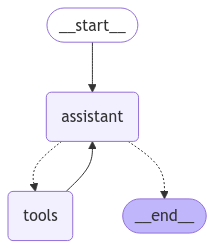

In [5]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph

# Graph
builder: StateGraph = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph: CompiledStateGraph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [6]:
messages = [HumanMessage(content="hey can you tell me who is the prime minister of pakistan in 202")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

hey can you tell me who is the prime minister of pakistan in 2024
================================== Ai Message ==================================

I cannot answer this question. The available tools lack the functionality to access and process real-time information, such as the current Prime Minister of Pakistan.


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph


# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing realtime searching using tavily ")
chat_history = []

def main_three():
  """ Get realtime information using tavily search """

  while True:


    try:
        # Prompt the user for input
        print("\n")
        # # user_input = input("User : ").strip()

        # # Exit condition
        # if user_input.lower() in ["quit", "exit", "q","bye"]:
        #     print("Bye! Have a great day!")
        #     break

        # # Handle empty input
        # if not user_input:
        #     print("No prompt found. Please type something.")
        #     continue

        # Add user input to chat history
        # chat_history.append({"role": "user", "content": user_input})

        # # Call the placeholder function (replace as needed)
        # try:
        #     stream_graph_updates(user_input)
        # except NameError:
        #     # Handle missing function gracefully
        #     print("stream_graph_updates is not implemented. Skipping.")

        # Perform a Tavily search if the function is not implemented
        search_docs = tavily_search.invoke()

        # Add Tavily response to chat history
        chat_history.append({"role": "assistant", "content": str(search_docs)})

        # Display results from Tavily search
        print("Search Results:")
        for i, doc in enumerate(search_docs, start=1):
            print(f"\nResult {i}:")
            print(f"Here is the {i} documentaion from web search you can get your answer from here:")
            print(f"Documentation: {doc.get('content', 'N/A')}")
            print(f"URL: {doc.get('url', 'N/A')}")

    except Exception as e:
        print(f"An error occurred: {e}")
        break

    print("\nChat History:")
    for message in chat_history:
      role = message["role"]
      content = message["content"]
      print(f"{role.capitalize()}: {content}")

tools = [main_three]
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GOOGLE_API_KEY)
llm_with_tools = llm.bind_tools(tools)

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}


# Graph
builder: StateGraph = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph: CompiledStateGraph = builder.compile()

# Show
# display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

messages = [HumanMessage(content=input("User : "))]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    # m.pretty_print()
    print(m.content)

User : are you able to real time sarching throughtool calling 
are you able to real time sarching throughtool calling 
Yes, I can perform real-time searching using the `default_api.main_three()` function.  However, the provided documentation doesn't specify what kind of search it performs or how to specify search terms.  To use it effectively, I need more information about the function's parameters and the format of its results.  The current documentation only shows the function signature, not its functionality.



In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from langgraph.graph.state import CompiledStateGraph



# Tavily real-time search function
def realtime_search(query: str) -> str:
    """
    Function to perform real-time searching using Tavily.
    """
    from tavily import TavilyClient  # Ensure TavilyClient is installed and configured
    client = TavilyClient()  # Replace with your API key
    try:
        results = client.search(query)
        return f"Search Results: {results}"  # Format the results as a string
    except Exception as e:
        return f"Error during search: {str(e)}"

# # Define tools
realtime_search_tool = Tool(
    name="realtime_search",
    func=realtime_search,
    description="This tool performs real-time searches using Tavily and returns relevant results."
)

# Add tools to the tools list
tools = [realtime_search_tool]

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GOOGLE_API_KEY)
llm_with_tools = llm.bind_tools(tools)

# Define system message
sys_msg = (
    "you are a realtime searching llm you are expert to use your tool for realtime searching when user asked anything You can use this tool to search and give response to me make sure dont give object to user give response in readable form:\n"
    "1. `realtime_search`: Search for real-time information on the web.\n"
)

# Define the assistant function
def assistant(state: MessagesState) -> MessagesState:
    """
    Assistant function that handles LLM responses.
    """
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Create the graph
builder: StateGraph = StateGraph(MessagesState)

# Add nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,  # If the assistant response is a tool call
)
builder.add_edge("tools", "assistant")

# Compile the graph
react_graph: CompiledStateGraph = builder.compile()

# User interaction
messages = [HumanMessage(content=input("User: "))]
messages = react_graph.invoke({"messages": messages})

# Print the output messages
for m in messages['messages']:
    print(m.content)


In [57]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langchain.agents import Tool

# Correctly define the tool in a format that LangChain expects
def realtime_search(query: str) -> str:
    """
    Function to perform real-time searching using Tavily.
    """
    from tavily import TavilyClient  # Ensure TavilyClient is installed and configured
    client = TavilyClient()  # Replace with your API key
    try:
        results = client.search(query)
        return f"Search Results: {results}"  # Format the results as a string
    except Exception as e:
        return f"Error during search: {str(e)}"

# Define the tool correctly as a callable object
realtime_search_tool = Tool(
    name="realtime_search",
    func=realtime_search,
    description="This tool performs real-time searches using Tavily and returns relevant results."
)


# Add tools to the tools list
tools = [realtime_search_tool]

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GOOGLE_API_KEY)
llm_with_tools = llm.bind_tools(tools)

# Define system message
sys_msg = (
    "you are a realtime searching llm you are expert to use your tool for realtime searching when user asked anything You can use this tool to search and give response to me make sure dont give object to user give response in readable form:\n"
    "1. realtime_search: Search for real-time information on the web.\n"
)

# Define the assistant function
def assistant(state: MessagesState) -> MessagesState:
    """
    Assistant function that handles LLM responses.
    """
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Create the graph
builder: StateGraph = StateGraph(MessagesState)

# Add nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,  # If the assistant response is a tool call
)
builder.add_edge("tools", "assistant")

# Compile the graph
react_graph: CompiledStateGraph = builder.compile()

# User interaction
messages = [HumanMessage(content=input("User: "))]
messages = react_graph.invoke({"messages": messages})

# Print the output messages
for m in messages['messages']:
    print(m.content)





User: who is the president of US
who is the president of US

Search Results: {'query': 'president of US', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'President of the United States - Simple English Wikipedia, the free ...', 'url': 'https://simple.wikipedia.org/wiki/President_of_the_United_States', 'content': 'The president is also the head of the executive branch of the federal government of the United States and is the chairman of the presidential cabinet.[10]\nJoe Biden is the 46th and current president of the United States, in office since January 2021.[11]\nEligibility and requirements[change | change source]\nArticle II, Section 1, Clause 5 of the constitution states for a person to serve as president must:\nElection process and presidential terms[change | change source]\nThe president is elected by the people through the Electoral College to a four-year term, along with the vice presidential candidate or the incumbent vice president of the Un